In [61]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import dateutil
import plotly.graph_objects as go
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt

In [20]:
data = pd.read_csv("./all-states-history.csv")

In [21]:
data.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [22]:
death_data = data[['date','death']].dropna()
death_data["date"] = death_data["date"].apply(dateutil.parser.parse, dayfirst=False)
death_data.head()

,date,death
0,2021-02-16,287.0
1,2021-02-16,9257.0
2,2021-02-16,5287.0
3,2021-02-16,0.0
4,2021-02-16,14981.0


<AxesSubplot:xlabel='ID', ylabel='daily_death_count'>

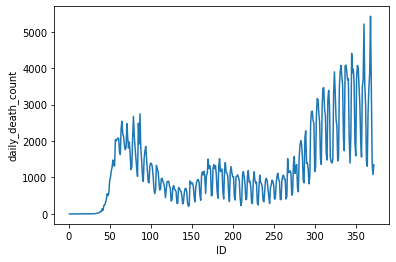

In [24]:
death_data = death_data.groupby(['date'])['death'].agg('sum').reset_index()
difference = death_data["death"].diff()
death_data["daily_death_count"] = difference
death_data = death_data.dropna()
death_data["ID"] = range(1, len(death_data) + 1)
sns.lineplot(x="ID", y="daily_death_count", data=death_data) 

<AxesSubplot:xlabel='date', ylabel='daily_death_count'>

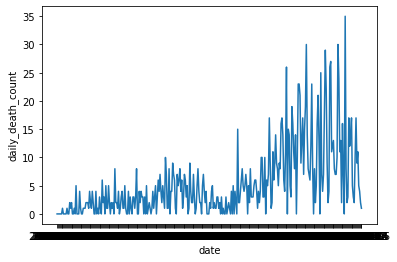

In [25]:
d = data[['date','death',"state"]].dropna()
ut_death = d[d['state']=='UT']

ut_death = ut_death.groupby(['date'])['death'].agg('sum').reset_index()
differ = ut_death["death"].diff()
ut_death["daily_death_count"] = differ
ut_death = ut_death.dropna()
sns.lineplot(x="date", y="daily_death_count", data=ut_death) 


In [26]:
def death_by_state(state):
    d = data[['date','death',"state"]].dropna()
    state_death = d[d['state']==state]

    state_death = state_death.groupby(['date'])['death'].agg('sum').reset_index()
    differ = state_death["death"].diff()
    state_death["daily_death_count"] = differ
    state_death = state_death.dropna()
    state_death["id"] = range(1, len(state_death) + 1)
    return state_death


<AxesSubplot:xlabel='id', ylabel='daily_death_count'>

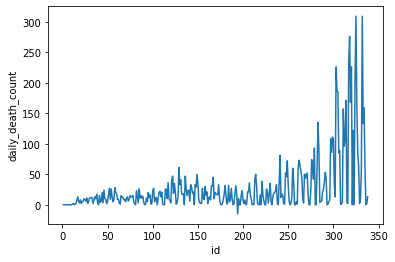

In [10]:
death_state = death_by_state("AL")
sns.lineplot(x="id", y="daily_death_count", data=death_state) 

In [44]:
death_data_by_state_ = data[['state', 'death']].dropna()
death_data_by_state_ = death_data_by_state_.groupby(['state'], sort=False)['death'].max().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=death_data_by_state_['state'], # Spatial coordinates
    z = death_data_by_state_['death'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Thousands",
))

fig.update_layout(
    title_text = 'Covid death by states',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


(0.830702163153482, 2.779510166612449e-13)

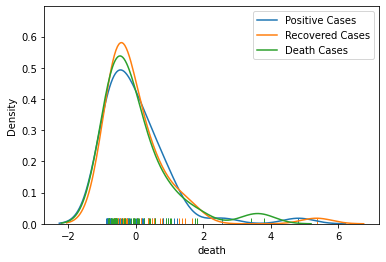

In [64]:
positive_vs_recover = data[['state', 'positive', 'recovered','death']].dropna()
positive_vs_recover = positive_vs_recover.groupby(['state'], sort=False)['positive', 'recovered', 'death'].max().reset_index()
display(stats.pearsonr(positive_vs_recover['positive'], positive_vs_recover['recovered']))
positive_vs_recover[['positive', 'recovered', 'death']] = StandardScaler().fit_transform(positive_vs_recover[['positive', 'recovered', 'death']])
plt.figure("Positive vs recovered distribution")
sns.distplot(positive_vs_recover['positive'], label="Positive Cases", rug=True, hist=False)
sns.distplot(positive_vs_recover['recovered'], label= "Recovered Cases", rug=True, hist=False)
sns.distplot(positive_vs_recover['death'], label= "Death Cases", rug=True, hist=False)
plt.legend()
plt.show()
#sns.regplot(x=positive_vs_recover['positive'], y=positive_vs_recover['recovered'])

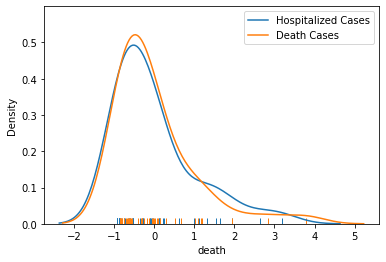

In [70]:
hospitalized_vs_death = data[['state', 'hospitalizedCumulative','death']].dropna()
hospitalized_vs_death = hospitalized_vs_death.groupby(['state'], sort=False)['hospitalizedCumulative', 'death'].max().reset_index()
hospitalized_vs_death[['hospitalizedCumulative', 'death']] = StandardScaler().fit_transform(hospitalized_vs_death[[ 'hospitalizedCumulative', 'death']])

plt.figure("Positive vs recovered distribution")
sns.distplot(hospitalized_vs_death['hospitalizedCumulative'], label="Hospitalized Cases", rug=True, hist=False)
sns.distplot(hospitalized_vs_death['death'], label= "Death Cases", rug=True, hist=False)
plt.legend()
plt.show()